In [119]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"/content/data.csv")

In [3]:
df.head()

,timestamp,act379,act13,act279,act323,act363,act302,latitude,longitude
0,28-02-2018 21:00,1,0,0,0,0,0,22.737260,75.875987
1,28-02-2018 21:15,1,0,0,0,0,0,22.720992,75.876083
2,28-02-2018 10:15,0,0,1,0,0,0,22.736676,75.883168
3,28-02-2018 10:15,0,0,1,0,0,0,22.746527,75.887139
4,28-02-2018 10:30,0,0,1,0,0,0,22.769531,75.888772


In [5]:
df.describe()

,act379,act13,act279,act323,act363,act302,latitude,longitude
count,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000
mean,0.189474,0.042105,0.326316,0.378947,0.052632,0.010526,22.716464,75.855261
std,0.391978,0.200877,0.468977,0.485241,0.223350,0.102081,0.050563,0.059993
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.531931,75.542195
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.700700,75.836600
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.720000,75.860581
75%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,22.738098,75.885012
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,22.929638,76.032055


In [6]:
df.isnull().sum()

timestamp    0
act379       0
act13        0
act279       0
act323       0
act363       0
act302       0
latitude     0
longitude    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  2090 non-null   object 
 1   act379     2090 non-null   int64  
 2   act13      2090 non-null   int64  
 3   act279     2090 non-null   int64  
 4   act323     2090 non-null   int64  
 5   act363     2090 non-null   int64  
 6   act302     2090 non-null   int64  
 7   latitude   2090 non-null   float64
 8   longitude  2090 non-null   float64
dtypes: float64(2), int64(6), object(1)
memory usage: 147.1+ KB


In [21]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

In [22]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format = '%d/%m/%Y %H:%M:%S')

In [23]:
df['timestamp']

0      2018-02-28 21:00:00
1      2018-02-28 21:15:00
2      2018-02-28 10:15:00
3      2018-02-28 10:15:00
4      2018-02-28 10:30:00
               ...        
2085   2018-07-03 03:50:00
2086   2018-07-03 21:10:00
2087   2018-07-03 12:10:00
2088   2018-07-03 10:35:00
2089   2018-07-03 23:45:00
Name: timestamp, Length: 2090, dtype: datetime64[ns]

In [26]:
column_1 = df.loc[:,'timestamp']

db=pd.DataFrame({"year": column_1.dt.year,
              "month": column_1.dt.month,
              "day": column_1.dt.day,
              "hour": column_1.dt.hour,
              "dayofyear": column_1.dt.dayofyear,
              "week": column_1.dt.week,
              "weekofyear": column_1.dt.weekofyear,
              "dayofweek": column_1.dt.dayofweek,
              "weekday": column_1.dt.weekday,
              "quarter": column_1.dt.quarter,
             })

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


In [27]:
data=df.drop('timestamp',axis=1)

In [117]:
data1=pd.concat([db,data],axis=1)

In [30]:
data1.head()

,year,month,day,hour,dayofyear,week,weekofyear,dayofweek,weekday,quarter,act379,act13,act279,act323,act363,act302,latitude,longitude
0,2018.0,2.0,28.0,21.0,59.0,9.0,9.0,2.0,2.0,1.0,1,0,0,0,0,0,22.737260,75.875987
1,2018.0,2.0,28.0,21.0,59.0,9.0,9.0,2.0,2.0,1.0,1,0,0,0,0,0,22.720992,75.876083
2,2018.0,2.0,28.0,10.0,59.0,9.0,9.0,2.0,2.0,1.0,0,0,1,0,0,0,22.736676,75.883168
3,2018.0,2.0,28.0,10.0,59.0,9.0,9.0,2.0,2.0,1.0,0,0,1,0,0,0,22.746527,75.887139
4,2018.0,2.0,28.0,10.0,59.0,9.0,9.0,2.0,2.0,1.0,0,0,1,0,0,0,22.769531,75.888772


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

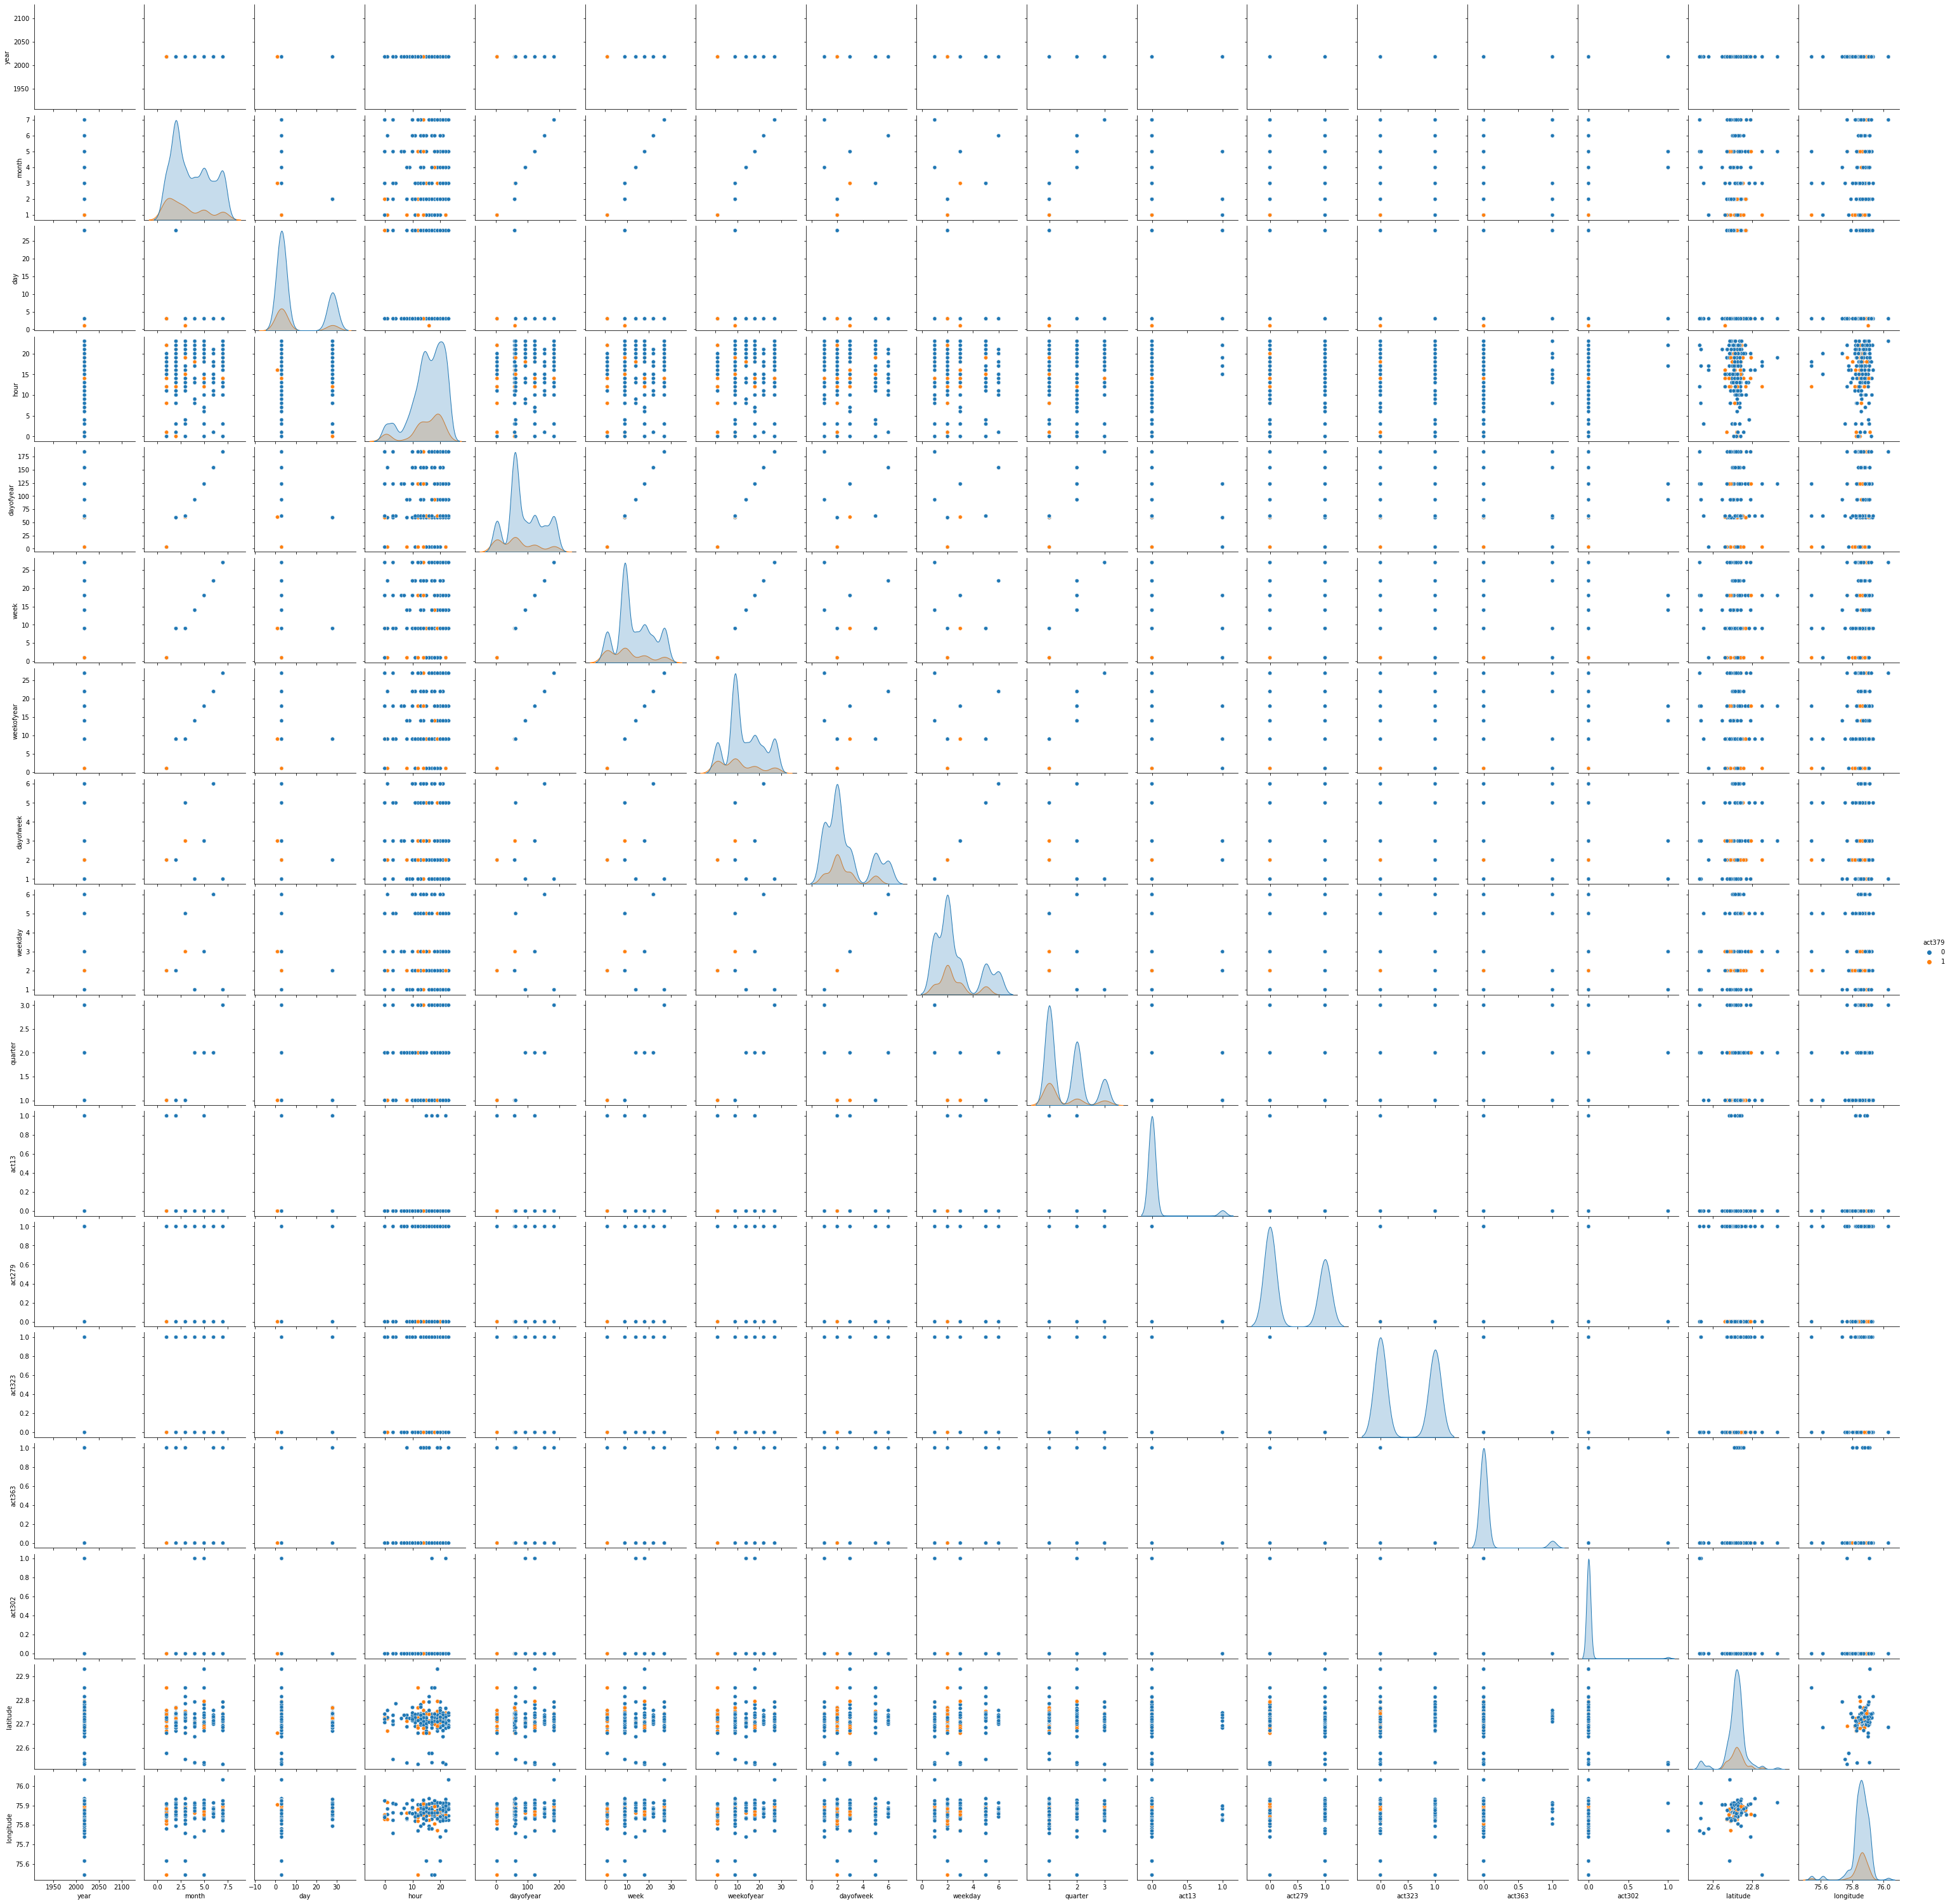

In [36]:
sns.pairplot(data1,hue='act379')
plt.show()

In [79]:
df1 = pd.DataFrame(data=data1, columns=['act13', 'act323', 'act379'])

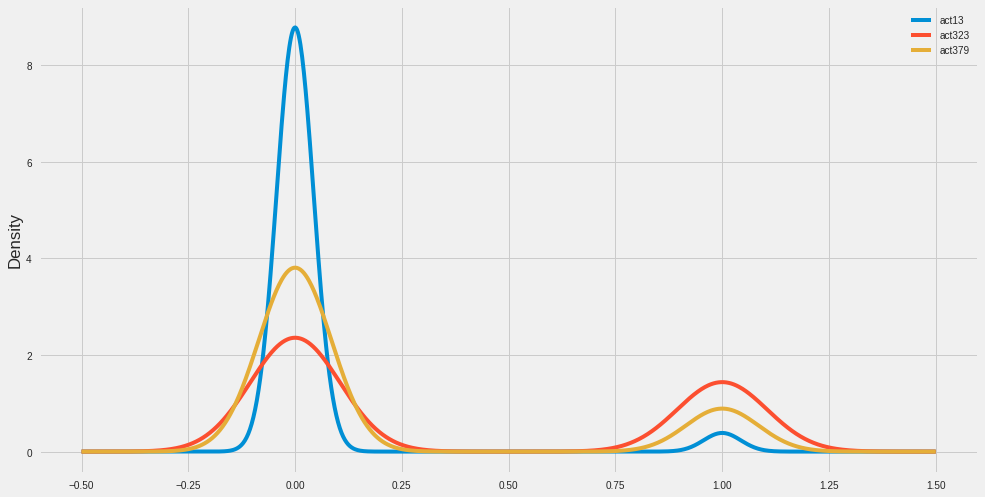

In [118]:
df1.plot.kde()

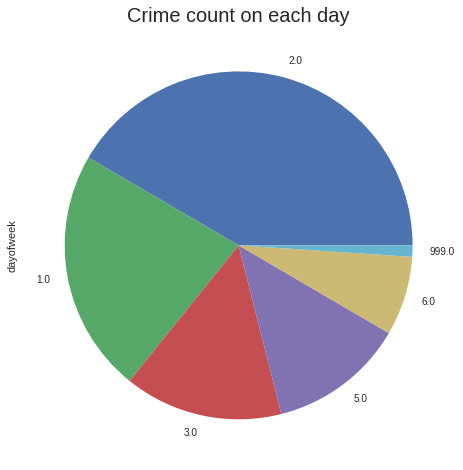

In [90]:
plt.style.use('seaborn')


data1['dayofweek'].value_counts().head(15).plot.pie(figsize = (15, 8), explode = None)

plt.title('Crime count on each day',fontsize = 20)

plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


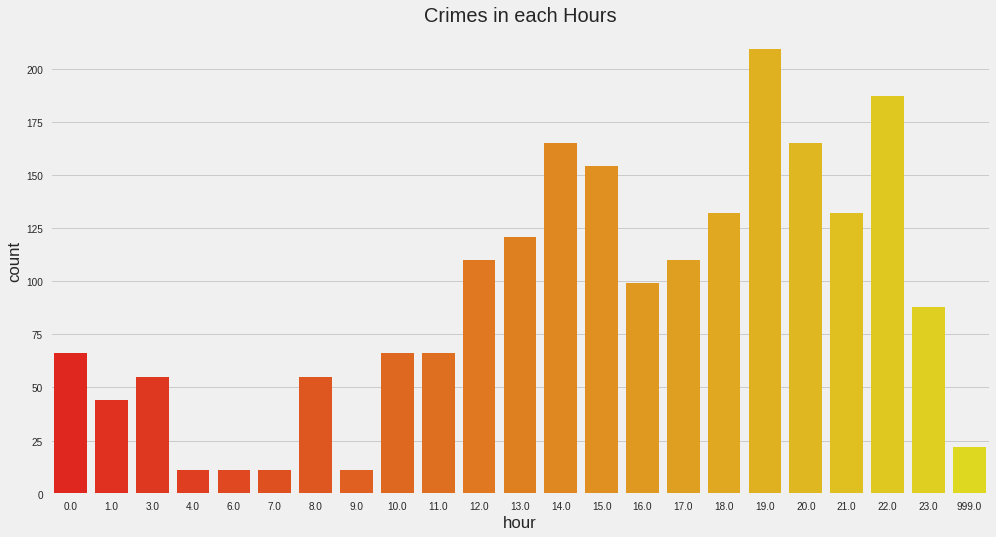

In [112]:


plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(data1['hour'], palette = 'autumn',)
plt.title('Crimes in each Hours', fontsize = 20)

plt.show()

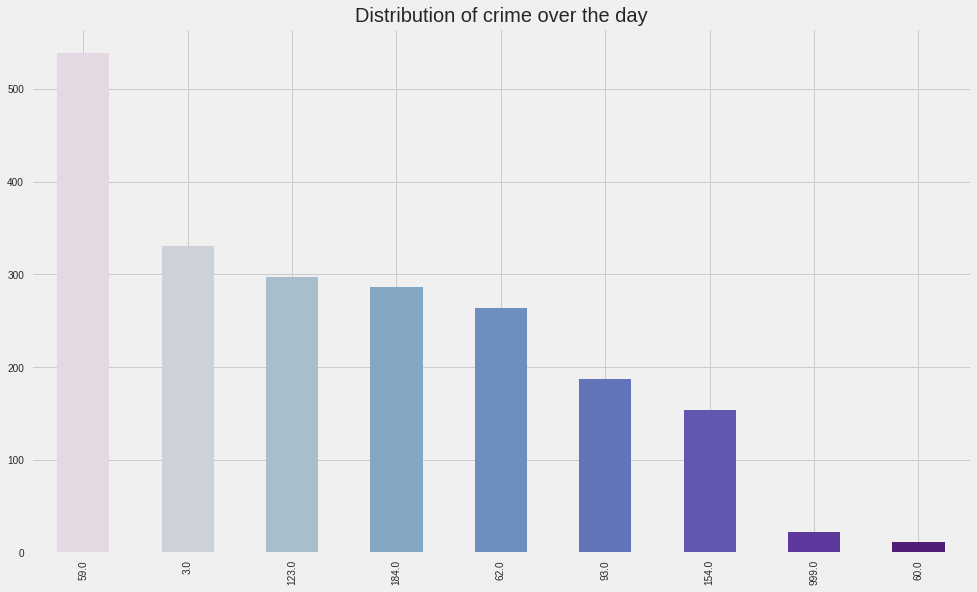

In [113]:
color = plt.cm.twilight(np.linspace(0, 5, 100))
data1['dayofyear'].value_counts().head(20).plot.bar(color = color, figsize = (15, 9))

plt.title('Distribution of crime over the day', fontsize = 20)
plt.show()

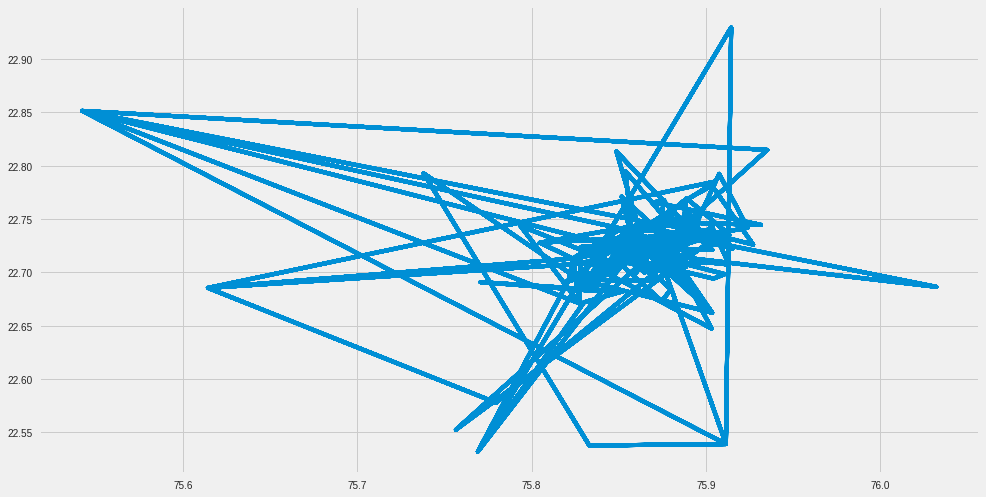

In [127]:
plt.plot(data1['longitude'], data1['latitude'])

In [53]:
X=data1.iloc[:,[1,2,3,4,6,16,17]].values
X

array([[ 2.      , 28.      , 21.      , ...,  9.      , 22.73726 ,
        75.875987],
       [ 2.      , 28.      , 21.      , ...,  9.      , 22.720992,
        75.876083],
       [ 2.      , 28.      , 10.      , ...,  9.      , 22.736676,
        75.883168],
       ...,
       [ 7.      ,  3.      , 12.      , ..., 27.      , 22.531931,
        75.769126],
       [ 7.      ,  3.      , 10.      , ..., 27.      , 22.719569,
        75.857726],
       [ 7.      ,  3.      , 23.      , ..., 27.      , 22.686437,
        76.032055]])

In [54]:
y=data1.iloc[:,[10,11,12,13,14,15]].values
y

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0]])

In [55]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)

In [56]:
data1.dropna(inplace=True)

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [58]:
knn.score(X_test,y_test)

0.9688995215311005

In [59]:
knn.score(X_train,y_train)

0.9814593301435407

In [60]:
error_rate = []
for i in range(1,140):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

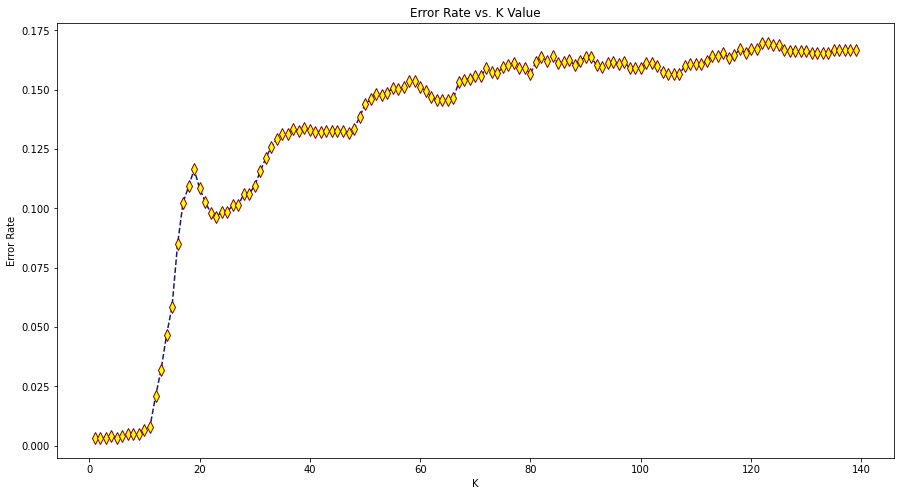

In [78]:
plt.figure(figsize=(15,8))
plt.plot(range(1,140),error_rate,color='midnightblue',markeredgecolor = 'maroon', linestyle='dashed', marker='d',
         markerfacecolor='yellow', markersize=8)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')